In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/italia/covid19-opendata-vaccini/master/dati/somministrazioni-vaccini-latest.csv')
df

,data_somministrazione,fornitore,area,fascia_anagrafica,sesso_maschile,sesso_femminile,prima_dose,seconda_dose,pregressa_infezione,dose_addizionale_booster,codice_NUTS1,codice_NUTS2,codice_regione_ISTAT,nome_area
0,2020-12-27,Pfizer/BioNTech,ABR,20-29,1,1,2,0,0,0,ITF,ITF1,13,Abruzzo
1,2020-12-27,Pfizer/BioNTech,ABR,30-39,1,4,5,0,0,0,ITF,ITF1,13,Abruzzo
2,2020-12-27,Pfizer/BioNTech,ABR,40-49,1,8,9,0,0,0,ITF,ITF1,13,Abruzzo
3,2020-12-27,Pfizer/BioNTech,ABR,50-59,7,6,13,0,0,0,ITF,ITF1,13,Abruzzo
4,2020-12-27,Pfizer/BioNTech,ABR,60-69,12,4,16,0,0,0,ITF,ITF1,13,Abruzzo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161117,2021-12-12,Pfizer/BioNTech,VEN,50-59,2963,2993,146,79,7,5724,ITH,ITH3,5,Veneto
161118,2021-12-12,Pfizer/BioNTech,VEN,60-69,1810,1896,69,49,0,3588,ITH,ITH3,5,Veneto
161119,2021-12-12,Pfizer/BioNTech,VEN,70-79,1490,1944,17,26,0,3391,ITH,ITH3,5,Veneto
161120,2021-12-12,Pfizer/BioNTech,VEN,80-89,564,943,17,6,1,1483,ITH,ITH3,5,Veneto


In [ ]:
df1 = pd.read_csv('https://raw.githubusercontent.com/italia/covid19-opendata-vaccini/master/dati/platea.csv')
df1

,area,nome_area,fascia_anagrafica,totale_popolazione
0,ABR,Abruzzo,12-19,94727
1,ABR,Abruzzo,20-29,125230
2,ABR,Abruzzo,30-39,146965
3,ABR,Abruzzo,40-49,187162
4,ABR,Abruzzo,50-59,208686
...,...,...,...,...
163,VEN,Veneto,40-49,715790
164,VEN,Veneto,50-59,806474
165,VEN,Veneto,60-69,610635
166,VEN,Veneto,70-79,494721


In [ ]:
df2 = df1.groupby('area')['totale_popolazione'].sum()
df2

area
ABR    1188922
BAS     494881
CAL    1689716
CAM    5104347
EMR    3998406
FVG    1088152
LAZ    5147533
LIG    1399466
LOM    9246804
MAR    1366477
MOL     273317
PAB     465181
PAT     481355
PIE    3927641
PUG    3572053
SAR    1484800
SIC    4435335
TOS    3360763
UMB     790414
VDA     110382
VEN    4383999
Name: totale_popolazione, dtype: int64

In [ ]:
dfG =  df.groupby('area', as_index=False)['prima_dose'].sum()
dfG.insert(2, "popolazione_totale", df2.values, True)
dfG

,area,prima_dose,popolazione_totale
0,ABR,993906,1188922
1,BAS,429419,494881
2,CAL,1385869,1689716
3,CAM,4237451,5104347
4,EMR,3480621,3998406
5,FVG,904903,1088152
6,LAZ,4555731,5147533
7,LIG,1189685,1399466
8,LOM,7987398,9246804
9,MAR,1136406,1366477


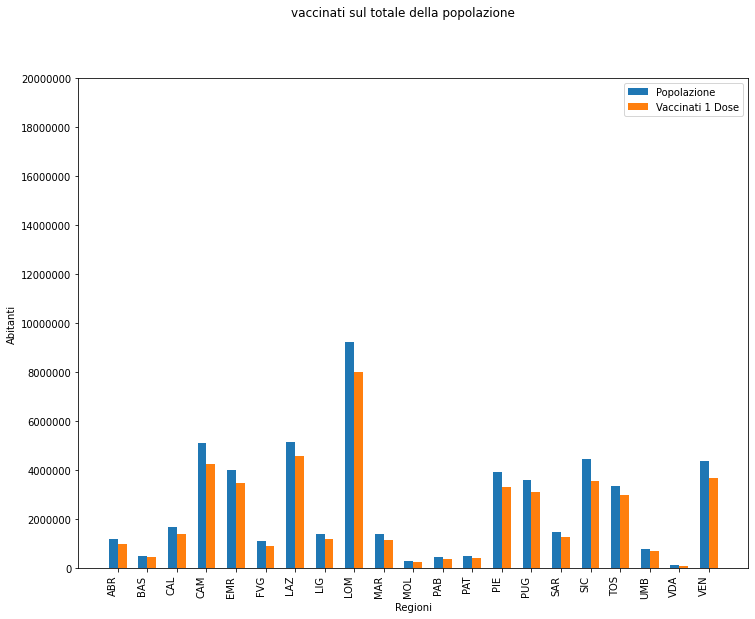

In [ ]:
fig = plt.figure(figsize=(12,10))
ax = plt.axes()
fig.suptitle('vaccinati sul totale della popolazione')


ax.bar(dfG.index-0.15, dfG['popolazione_totale'], label="Popolazione", width=0.3)
ax.bar(dfG.index+0.15, dfG['prima_dose'], label="Vaccinati 1 Dose", width=0.3)
plt.xticks(dfG.index, dfG["area"])


fig.autofmt_xdate(rotation=90)


ax.legend(loc=1)

ax.set_xlabel('Regioni')                           
ax.set_ylabel('Abitanti') 

ax.set_ylim([0, 20000000])                              
ax.set_yticklabels(np.arange(0, 20000001, step=2000000))
ax.set_yticks(np.arange(0, 20000001, step=2000000))

                          
plt.show()

fig.savefig('Grafico1.png')

In [ ]:
dfP = dfG['prima_dose']*100/dfG['popolazione_totale']
dfP

0     83.597242
1     86.772174
2     82.017866
3     83.016515
4     87.050215
5     83.159614
6     88.503192
7     85.009925
8     86.380094
9     83.163200
10    87.195820
11    80.140418
12    85.820029
13    83.889184
14    87.274853
15    85.549569
16    80.079859
17    88.673346
18    86.371066
19    81.360186
20    84.074631
dtype: float64

In [ ]:
df3 = df1.groupby('area', as_index=False)[['totale_popolazione']].sum()
df3.insert(2, "Percentuale_Vaccinati_Prima_Dose", dfP.values, True)
df3

,area,totale_popolazione,Percentuale_Vaccinati_Prima_Dose
0,ABR,1188922,83.597242
1,BAS,494881,86.772174
2,CAL,1689716,82.017866
3,CAM,5104347,83.016515
4,EMR,3998406,87.050215
5,FVG,1088152,83.159614
6,LAZ,5147533,88.503192
7,LIG,1399466,85.009925
8,LOM,9246804,86.380094
9,MAR,1366477,83.163200


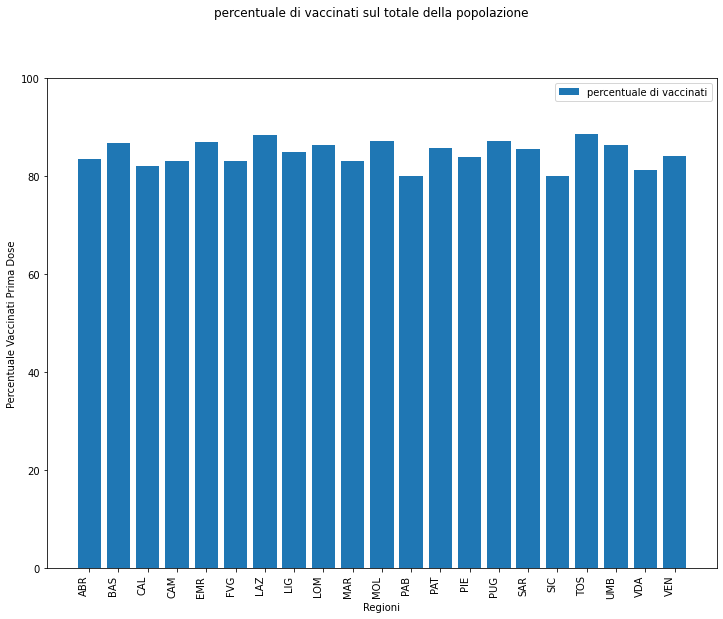

In [ ]:
fig = plt.figure(figsize=(12,10))
ax = plt.axes()

fig.suptitle('percentuale di vaccinati sul totale della popolazione')


ax.bar(df3['area'], df3['Percentuale_Vaccinati_Prima_Dose'], label="percentuale di vaccinati")


fig.autofmt_xdate(rotation=90)

ax.legend(loc=1)

ax.set_xlabel('Regioni')                           
ax.set_ylabel('Percentuale Vaccinati Prima Dose') 

ax.set_ylim([0, 100])                              
ax.set_yticks(np.arange(0, 101, step=20))

plt.show()
fig.savefig('Grafico2.png')




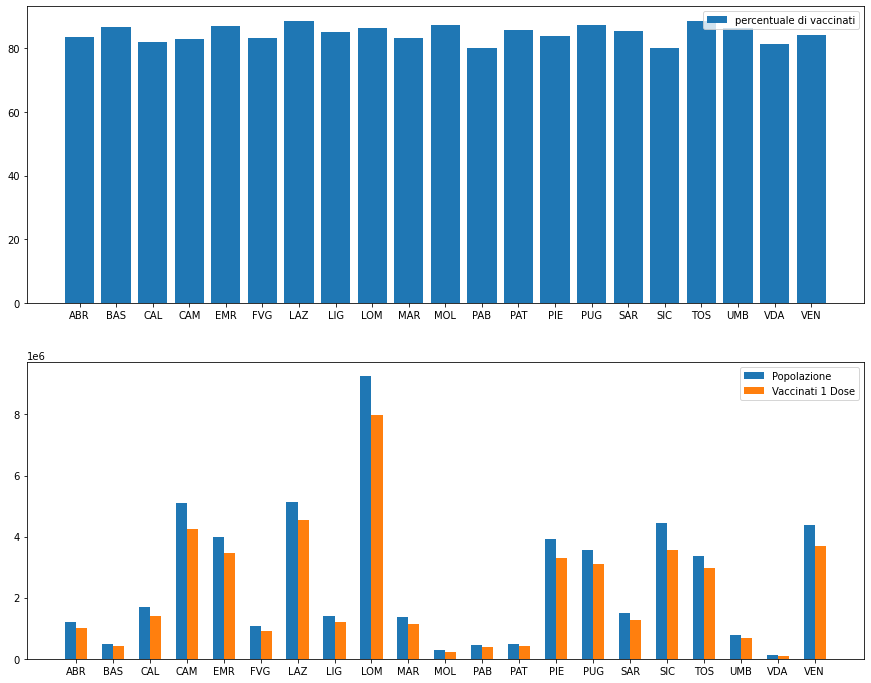

In [ ]:
fig, (ax, ax1) = plt.subplots(2, figsize= (15,12))

ax.bar(df3['area'], df3['Percentuale_Vaccinati_Prima_Dose'], label="percentuale di vaccinati")
ax.legend(loc=1)

ax1.bar(dfG.index-0.15, dfG['popolazione_totale'], label="Popolazione", width=0.3)
ax1.bar(dfG.index+0.15, dfG['prima_dose'], label="Vaccinati 1 Dose", width=0.3)
plt.xticks(dfG.index, dfG["area"])
ax1.legend(loc=1)

plt.show()

In [ ]:
fig.savefig("grafici.png")